In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv("../Week04/datasets/perovai_devices_day6_stability_ready.csv")
model = joblib.load("datasets/perovai_best_model_week05.pkl")

features = [
    "Voc_V_Reverse",
    "Jsc_mAcm2_Reverse",
    "FF_Reverse",
    "Rs_ohm_cm2_Reverse",
    "Rsh_ohm_cm2_Reverse",
    "Delta_PCE",
    "Hysteresis_Index"
]

X = df[features]
y = df["Unstable"]

In [3]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_prob = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

In [4]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[54  1]
 [ 0 51]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        51

    accuracy                           0.99       106
   macro avg       0.99      0.99      0.99       106
weighted avg       0.99      0.99      0.99       106



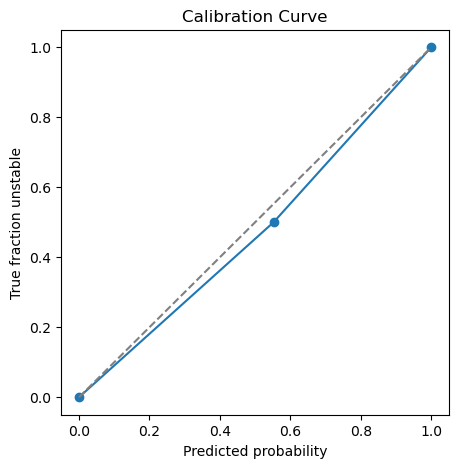

In [5]:
prob_true, prob_pred = calibration_curve(y, y_prob, n_bins=10)

plt.figure(figsize=(5,5))
plt.plot(prob_pred, prob_true, marker="o")
plt.plot([0,1],[0,1], "--", color="gray")
plt.xlabel("Predicted probability")
plt.ylabel("True fraction unstable")
plt.title("Calibration Curve")
plt.show()

In [6]:
brier = brier_score_loss(y, y_prob)
print("Brier score:", brier)

Brier score: 0.004896521766403757


In [7]:
calibrated_model = CalibratedClassifierCV(model, method="isotonic", cv=5)
calibrated_model.fit(X, y)

joblib.dump(calibrated_model, "datasets/perovai_best_model_calibrated.pkl")
print("Saved: perovai_best_model_calibrated.pkl")

Saved: perovai_best_model_calibrated.pkl


In [8]:
df["Predicted_Instability_Prob"] = y_prob
df["Predicted_Label"] = y_pred

df.to_csv("datasets/perovai_week05_day2_predictions.csv", index=False)
print("Saved: perovai_week05_day2_predictions.csv")

Saved: perovai_week05_day2_predictions.csv
